# Calculate π

ref: https://docs.ray.io/en/latest/ray-core/examples/monte_carlo_pi.html

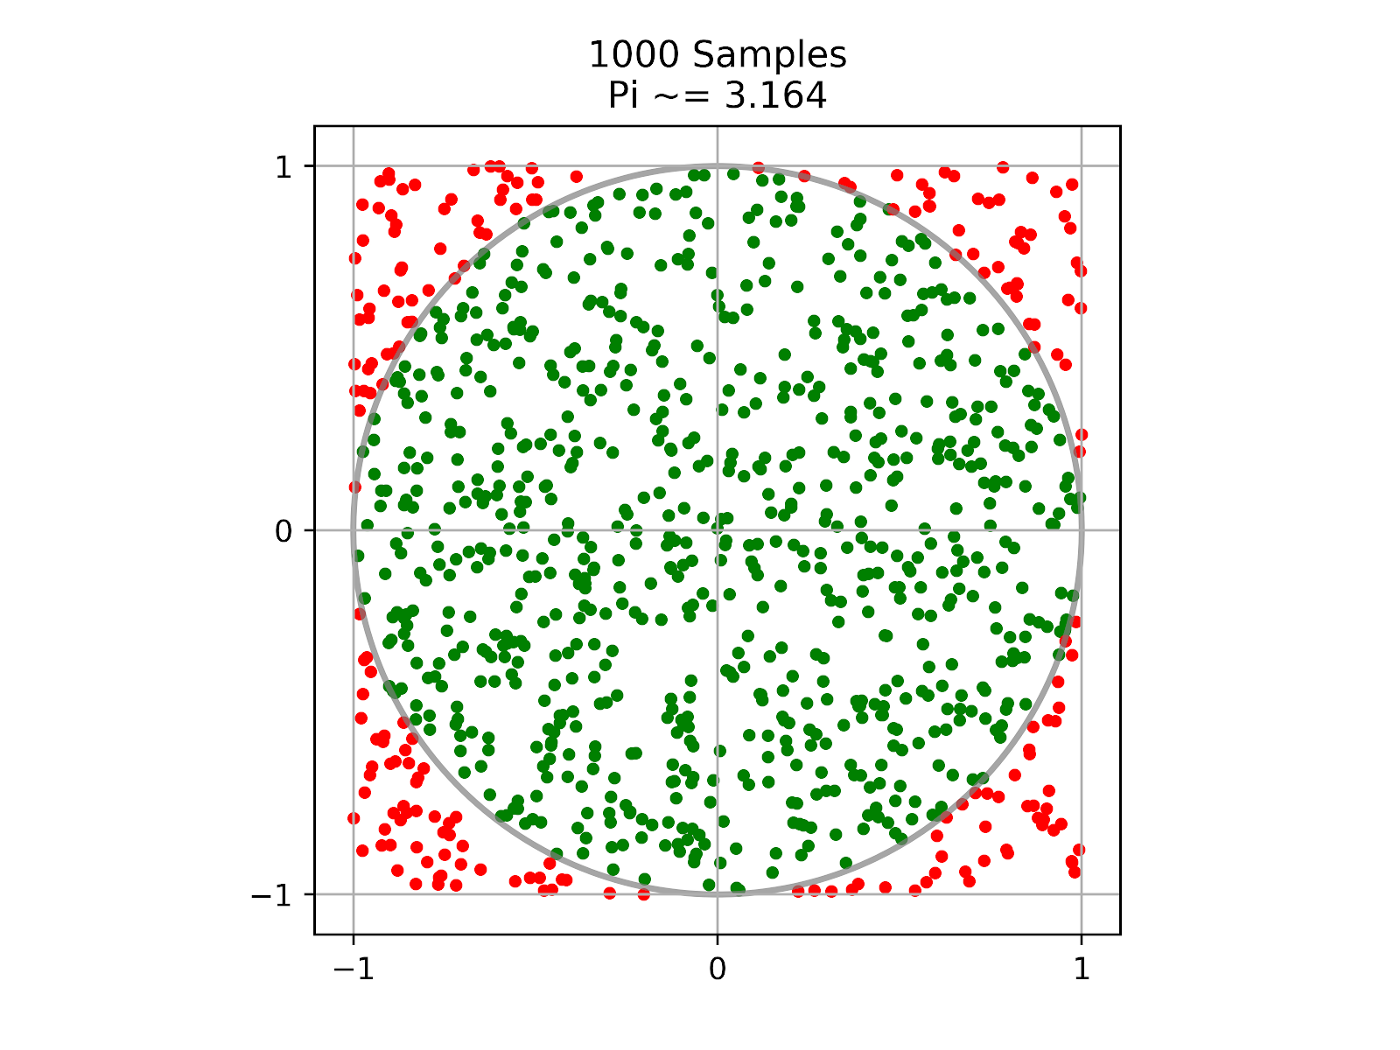!


In [6]:
! pip install ray[default]

# We can get this address from the workder node of the RayCluster

%env RAY_ADDRESS=cpu-raycluster-head-svc.default.svc.cluster.local:6379  #CPU Cluster

env: RAY_ADDRESS=cpu-raycluster-head-svc.default.svc.cluster.local:6379  #CPU Cluster


## 1. A Two-node cluster

- head node: 2 CPU, 4GB RAM
- worker node: 2 CPU, 4GB RAM
- Total: 4 CPUs

In [13]:
!ray job submit -- python $(pwd)/pi.py

Job submission server address: http://100.64.119.226:8265

-------------------------------------------------------
Job 'raysubmit_W9gpHuZ618Vv8bSu' submitted successfully
-------------------------------------------------------

Next steps
  Query the logs of the job:
    ray job logs raysubmit_W9gpHuZ618Vv8bSu
  Query the status of the job:
    ray job status raysubmit_W9gpHuZ618Vv8bSu
  Request the job to be stopped:
    ray job stop raysubmit_W9gpHuZ618Vv8bSu

Tailing logs until the job exits (disable with --no-wait):
2023-12-19 11:17:37,833	INFO worker.py:1354 -- Using address 100.64.119.226:6379 set in the environment variable RAY_ADDRESS
2023-12-19 11:17:37,833	INFO worker.py:1489 -- Connecting to existing Ray cluster at address: 100.64.119.226:6379...
2023-12-19 11:17:37,844	INFO worker.py:1664 -- Connected to Ray cluster. View the dashboard at http://100.64.119.226:8265 
Progress: 0%
Progress: 34%
Progress: 69%
Progress: 95%
Progress: 100%
Estimated value of π is: 3.14150444
Run

## 2. Remove the worker node

Leaving just a the head node of 2 CPUs.

```
kubectl patch raycluster cpu-raycluster --type='json' -p='[{"op": "replace", "path": "/spec/workerGroupSpecs/0/replicas", "value": 0}]' -n default
```

In [16]:
!ray job submit -- python $(pwd)/pi.py

Job submission server address: http://100.64.119.226:8265

-------------------------------------------------------
Job 'raysubmit_BeCZfrNjRM6LhH3C' submitted successfully
-------------------------------------------------------

Next steps
  Query the logs of the job:
    ray job logs raysubmit_BeCZfrNjRM6LhH3C
  Query the status of the job:
    ray job status raysubmit_BeCZfrNjRM6LhH3C
  Request the job to be stopped:
    ray job stop raysubmit_BeCZfrNjRM6LhH3C

Tailing logs until the job exits (disable with --no-wait):
2023-12-19 11:35:53,858	INFO worker.py:1354 -- Using address 100.64.119.226:6379 set in the environment variable RAY_ADDRESS
2023-12-19 11:35:53,858	INFO worker.py:1489 -- Connecting to existing Ray cluster at address: 100.64.119.226:6379...
2023-12-19 11:35:53,869	INFO worker.py:1664 -- Connected to Ray cluster. View the dashboard at http://100.64.119.226:8265 
Progress: 0%
Progress: 14%
Progress: 31%
Progress: 47%
Progress: 65%
Progress: 80%
Progress: 98%
Progress: 10